### COVID-19 on ventilator prediction model based on Covid cases and hospitalisation


In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC  
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Get the curent date/time
today = pd.to_datetime('today')

In [3]:
# Downloads the lates data availlable and saves it.
# Run this step dayly to update the data.

# df_Covid_data = pd.read_csv('https://covidtracking.com/data/download/national-history.csv')
# df_Covid_data.to_csv('National_Covid_Data_'+today.strftime("%Y-%m-%d")+'.csv')

In [4]:
# Loads the last saved data. Make sure the data is up to date by running the cell above. 
df_Covid_data = pd.read_csv('National_Covid_Data_'+today.strftime("%Y-%m-%d")+'.csv')
df_Covid_data

,Unnamed: 0,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,0,2020-12-08,277367.0,2622,32406.0,20483.0,4193,104600.0,593679.0,164563564,1184838,3359.0,7245.0,14930563,213498,5786915.0,56,207572528,1638354
1,1,2020-12-07,274745.0,1347,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,3328.0,7073.0,14717065,180193,5714557.0,56,205934174,1835388
2,2,2020-12-06,273398.0,1146,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,3322.0,7095.0,14536872,177801,5624609.0,56,204098786,1648306
3,3,2020-12-05,272252.0,2461,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,3321.0,7006.0,14359071,212880,5576152.0,56,202450480,2190899
4,4,2020-12-04,269791.0,2563,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,3305.0,6999.0,14146191,224831,5470389.0,56,200259581,1854869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,317,2020-01-26,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
318,318,2020-01-25,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
319,319,2020-01-24,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
320,320,2020-01-23,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,1


In [5]:
# Check for shape, null values and data types of the data
print("Size/Shape of the dataset",df_Covid_data.shape)
print("Checking for null values:\n",df_Covid_data.isnull().sum())
print("Checking Data-type:",df_Covid_data.dtypes)

Size/Shape of the dataset (322, 19)
Checking for null values:
 Unnamed: 0                   0
date                         0
death                       19
deathIncrease                0
inIcuCumulative             63
inIcuCurrently              64
hospitalizedIncrease         0
hospitalizedCurrently       55
hospitalizedCumulative      42
negative                     0
negativeIncrease             0
onVentilatorCumulative      70
onVentilatorCurrently       63
positive                     0
positiveIncrease             0
recovered                   63
states                       0
totalTestResults             0
totalTestResultsIncrease     0
dtype: int64
Checking Data-type: Unnamed: 0                    int64
date                         object
death                       float64
deathIncrease                 int64
inIcuCumulative             float64
inIcuCurrently              float64
hospitalizedIncrease          int64
hospitalizedCurrently       float64
hospitalizedCumulative     

In [6]:
# Print the column names
df_Covid_data.columns

Index(['Unnamed: 0', 'date', 'death', 'deathIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'hospitalizedIncrease', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'negative', 'negativeIncrease',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'recovered', 'states', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [7]:
#Drop columns that are not needed for the model
df_Covid_data.drop(['Unnamed: 0','death',\
       'deathIncrease','onVentilatorCumulative','states'],1,inplace = True)

In [8]:
df_Covid_data.columns

Index(['date', 'inIcuCumulative', 'inIcuCurrently', 'hospitalizedIncrease',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'negative',
       'negativeIncrease', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'recovered', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [9]:
df_Covid_data

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,2020-12-08,32406.0,20483.0,4193,104600.0,593679.0,164563564,1184838,7245.0,14930563,213498,5786915.0,207572528,1638354
1,2020-12-07,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,7073.0,14717065,180193,5714557.0,205934174,1835388
2,2020-12-06,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,7095.0,14536872,177801,5624609.0,204098786,1648306
3,2020-12-05,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,7006.0,14359071,212880,5576152.0,202450480,2190899
4,2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2020-01-26,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
318,2020-01-25,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
319,2020-01-24,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
320,2020-01-23,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,1


In [10]:
# Drop the null rows and sort the data by date
df_Covid_data = df_Covid_data.dropna()
df_Covid_data = df_Covid_data.sort_values(by = "date", ascending = True)
df_Covid_data

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
257,2020-03-26,91.0,1299.0,2478,7805.0,9551.0,482148,86516,258.0,92976,17734,97.0,632999,108422
256,2020-03-27,124.0,1792.0,2572,10978.0,12123.0,559423,77275,324.0,112220,19244,2418.0,735114,102115
255,2020-03-28,140.0,2174.0,2409,12409.0,14532.0,657185,97762,390.0,131826,19606,3145.0,835570,100456
254,2020-03-29,156.0,2456.0,2794,14055.0,17326.0,722597,65412,439.0,151270,19444,4076.0,919122,83552
253,2020-03-30,187.0,3087.0,2472,15917.0,19798.0,818231,95634,451.0,172740,21470,4560.0,1035705,116583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
3,2020-12-05,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,7006.0,14359071,212880,5576152.0,202450480,2190899
2,2020-12-06,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,7095.0,14536872,177801,5624609.0,204098786,1648306
1,2020-12-07,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,7073.0,14717065,180193,5714557.0,205934174,1835388


In [11]:
# Set the date as index
df_Covid_data.set_index('date', inplace =True)
df_Covid_data

,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,
2020-03-26,91.0,1299.0,2478,7805.0,9551.0,482148,86516,258.0,92976,17734,97.0,632999,108422
2020-03-27,124.0,1792.0,2572,10978.0,12123.0,559423,77275,324.0,112220,19244,2418.0,735114,102115
2020-03-28,140.0,2174.0,2409,12409.0,14532.0,657185,97762,390.0,131826,19606,3145.0,835570,100456
2020-03-29,156.0,2456.0,2794,14055.0,17326.0,722597,65412,439.0,151270,19444,4076.0,919122,83552
2020-03-30,187.0,3087.0,2472,15917.0,19798.0,818231,95634,451.0,172740,21470,4560.0,1035705,116583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
2020-12-05,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,7006.0,14359071,212880,5576152.0,202450480,2190899
2020-12-06,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,7095.0,14536872,177801,5624609.0,204098786,1648306


In [12]:
# Specified data columns to be used in the model 
X = df_Covid_data[['hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease','recovered']]
y = df_Covid_data['onVentilatorCurrently'].values.reshape(-1,1)
y

array([[ 258.],
       [ 324.],
       [ 390.],
       [ 439.],
       [ 451.],
       [ 507.],
       [ 561.],
       [ 574.],
       [ 623.],
       [ 656.],
       [ 652.],
       [2961.],
       [4076.],
       [4131.],
       [5794.],
       [5937.],
       [5978.],
       [5968.],
       [6168.],
       [5975.],
       [6032.],
       [5940.],
       [6096.],
       [5729.],
       [5603.],
       [5567.],
       [5514.],
       [5474.],
       [5464.],
       [5187.],
       [5266.],
       [5121.],
       [4867.],
       [4760.],
       [4796.],
       [4712.],
       [4707.],
       [4845.],
       [4761.],
       [4848.],
       [4818.],
       [4753.],
       [7070.],
       [6788.],
       [6551.],
       [6395.],
       [6350.],
       [6352.],
       [6156.],
       [5940.],
       [5746.],
       [5529.],
       [5467.],
       [5257.],
       [5032.],
       [4911.],
       [4868.],
       [4716.],
       [4620.],
       [4383.],
       [4237.],
       [4215.],
       [

In [13]:

print(X.shape, y.shape)


(258, 5) (258, 1)


## Model - LinearRegression

In [14]:
# Split the data to testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y,)


In [15]:
X_train

,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered
date,,,,,
2020-09-25,1320,29900.0,6966421,55189,2725475.0
2020-09-04,1227,34191.0,6143785,51513,2281748.0
2020-10-31,2082,47486.0,9048711,90585,3610296.0
2020-05-11,1369,46550.0,1350031,18298,232012.0
2020-09-15,1453,30447.0,6529591,34905,2493331.0
...,...,...,...,...,...
2020-08-09,862,48997.0,5000326,50153,1655695.0
2020-04-20,2311,56734.0,785279,26105,69507.0
2020-08-02,831,54106.0,4628823,46510,1467653.0


In [16]:
# Choose the model
model = LinearRegression()
model

LinearRegression()

In [17]:
# model.fit(X_train, y_train)

In [18]:
# print(f"Training Data Score: {model.score(X_train, y_train)}")
# print(f"Testing Data Score: {model.score(X_test, y_test)}")

In [19]:
# print('Weight coefficients:', model.coef_)
# print('y-axis intercept:', model.intercept_)

### Skaling the data using StandardScaler, and plotting a residual plot


In [20]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [21]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [22]:
# X_train = X_scaler.inverse_transform(X_train_scaled)
# X_train

In [23]:
y_train_scaled.shape

(193, 1)

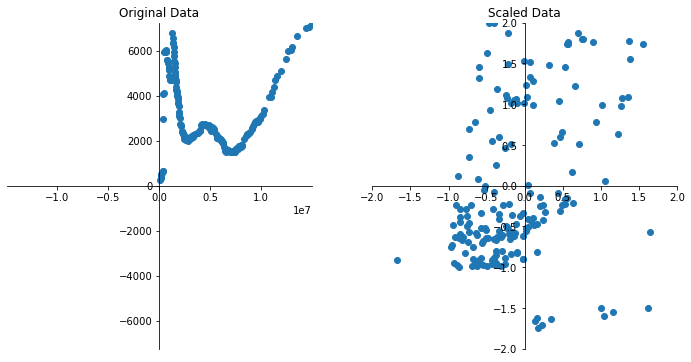

In [24]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["positive"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["positive"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

###  Fit the Model to the scaled training data and make predictions using the scaled test data

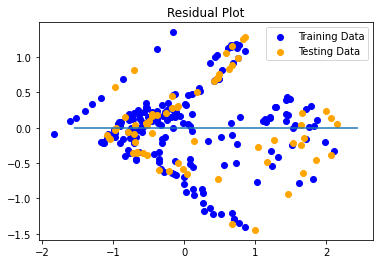

In [25]:
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [26]:
print(f"Training scaled Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing scaled Data Score: {model.score(X_test_scaled, y_test_scaled)}")
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)


Training scaled Data Score: 0.7172406729991689
Testing scaled Data Score: 0.7398614336314797
Weight coefficients: [[ 0.01138638  1.32542061 -2.57320228 -0.57426909  2.37450799]]
y-axis intercept: [5.83662146e-16]


## Quantify the model using scaled data

In [27]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.32674058763508773, R2: 0.7398614336314797


In [28]:
X_scaled = X_scaler.transform(X)
predictions = model.predict(X_scaled)
print(f"True output:{y[0]}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions[0]).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions[0]).round(2)-y[0]}") 

True output:[258.]
Predicted output:[106.39]
Prediction Error:[-151.61]


In [29]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)
predicted_y.reshape(1,-1).tolist()[0]


[106.39,
 468.94,
 623.79,
 824.63,
 994.05,
 1191.76,
 1502.5,
 1702.84,
 1952.46,
 2482.71,
 2853.82,
 3270.22,
 4186.27,
 4382.4,
 5005.29,
 5264.35,
 5585.03,
 5609.23,
 5778.26,
 6143.04,
 6080.94,
 5961.29,
 5850.11,
 5792.46,
 5602.95,
 5636.76,
 6011.03,
 5895.7,
 5803.68,
 5479.49,
 5433.07,
 5446.16,
 5536.06,
 5468.88,
 5444.62,
 5201.53,
 5195.85,
 5080.5,
 4958.73,
 4985.81,
 5071.55,
 4909.53,
 4716.15,
 4502.32,
 4348.04,
 4187.86,
 4242.9,
 4244.28,
 4199.37,
 3948.9,
 3761.76,
 3690.16,
 3552.93,
 3528.63,
 3537.53,
 3499.53,
 3319.23,
 3302.74,
 3132.72,
 3091.69,
 3102.17,
 3313.65,
 3155.27,
 3243.41,
 3074.88,
 2918.4,
 2899.2,
 2876.91,
 2813.35,
 2741.51,
 2636.75,
 2573.28,
 2510.82,
 2516.99,
 2520.52,
 2529.59,
 2417.46,
 2248.29,
 2147.17,
 1994.83,
 1994.13,
 2070.83,
 2012.15,
 2027.95,
 1932.82,
 1859.51,
 1738.11,
 1814.49,
 1951.72,
 1974.25,
 1951.32,
 1998.98,
 1850.05,
 1947.74,
 1944.99,
 2138.85,
 2163.74,
 2213.49,
 2370.19,
 2360.92,
 2356.24,
 25

In [30]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)

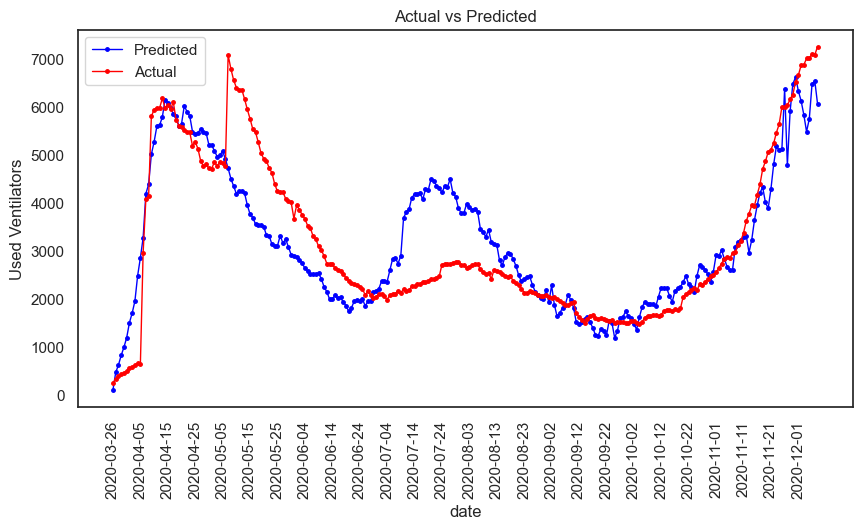

In [31]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data.index, predicted_y, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data.index, df_Covid_data['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()

# Model 2 Random Forest Regressor

In [32]:
## Model 2
#Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [33]:
y_train_scaled_1d = y_train_scaled .ravel()
y_test_scaled_1d = y_test_scaled .ravel()

In [34]:
rg = RandomForestRegressor(n_estimators=40)
rg.fit(X_train_scaled, y_train_scaled_1d)

RandomForestRegressor(n_estimators=40)

In [35]:
print(f"Training scaled Data Score: {rg.score(X_train_scaled, y_train_scaled)}")
print(f"Testing scaled Data Score: {rg.score(X_test_scaled, y_test_scaled)}")

Training scaled Data Score: 0.996515083568858
Testing scaled Data Score: 0.982720154599096


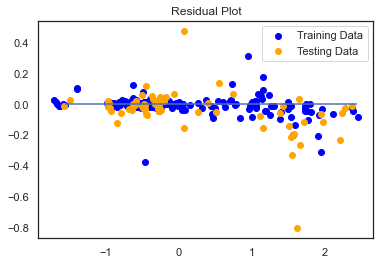

In [36]:
# Build residual plot
plt.scatter(rg.predict(X_train_scaled), rg.predict(X_train_scaled) - y_train_scaled_1d, c="blue", label="Training Data")
plt.scatter(rg.predict(X_test_scaled), rg.predict(X_test_scaled) - y_test_scaled_1d, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled_1d.min(), xmax=y_test_scaled_1d.max())
plt.title("Residual Plot")
plt.show()

In [37]:
predictions_rg = rg.predict(X_scaled)
print(f"True output:{y}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions_rg).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions_rg).round(2)-y}") 

True output:[[ 258.]
 [ 324.]
 [ 390.]
 [ 439.]
 [ 451.]
 [ 507.]
 [ 561.]
 [ 574.]
 [ 623.]
 [ 656.]
 [ 652.]
 [2961.]
 [4076.]
 [4131.]
 [5794.]
 [5937.]
 [5978.]
 [5968.]
 [6168.]
 [5975.]
 [6032.]
 [5940.]
 [6096.]
 [5729.]
 [5603.]
 [5567.]
 [5514.]
 [5474.]
 [5464.]
 [5187.]
 [5266.]
 [5121.]
 [4867.]
 [4760.]
 [4796.]
 [4712.]
 [4707.]
 [4845.]
 [4761.]
 [4848.]
 [4818.]
 [4753.]
 [7070.]
 [6788.]
 [6551.]
 [6395.]
 [6350.]
 [6352.]
 [6156.]
 [5940.]
 [5746.]
 [5529.]
 [5467.]
 [5257.]
 [5032.]
 [4911.]
 [4868.]
 [4716.]
 [4620.]
 [4383.]
 [4237.]
 [4215.]
 [4222.]
 [4080.]
 [4032.]
 [4004.]
 [3669.]
 [3950.]
 [3852.]
 [3749.]
 [3665.]
 [3523.]
 [3476.]
 [3298.]
 [3240.]
 [3090.]
 [3020.]
 [2886.]
 [2734.]
 [2726.]
 [2716.]
 [2640.]
 [2594.]
 [2588.]
 [2520.]
 [2434.]
 [2380.]
 [2321.]
 [2299.]
 [2293.]
 [2248.]
 [2214.]
 [2075.]
 [2159.]
 [2077.]
 [2011.]
 [2044.]
 [2098.]
 [2105.]
 [2049.]
 [1982.]
 [2080.]
 [2105.]
 [2098.]
 [2172.]
 [2127.]
 [2197.]
 [2169.]
 [2182.]
 [2259.

In [38]:
predicted_y_rg = y_scaler.inverse_transform(predictions_rg).round(2)

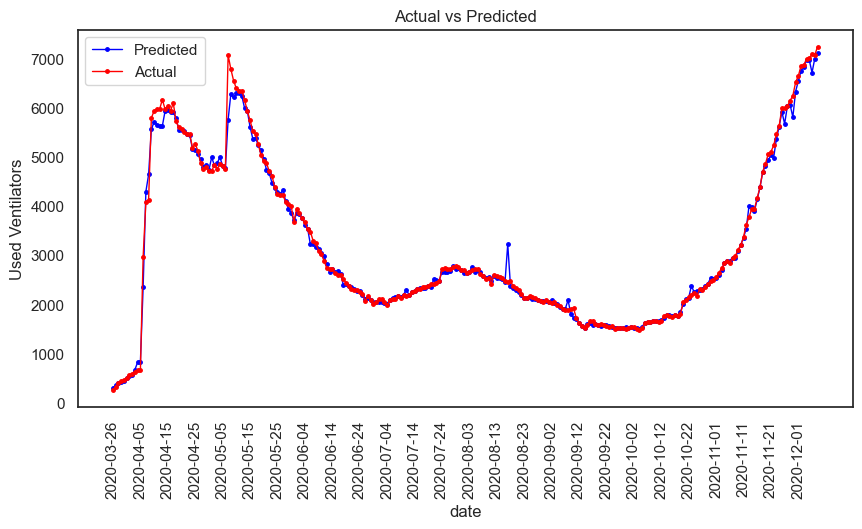

In [39]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data.index, predicted_y_rg, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data.index, df_Covid_data['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()

### The random forest regresor scored great with R2 of 0.99, however the random forest regressor is unable to discover trends that would enable it in extrapolating values that fall outside the training set. Having in mind that the currnet covid cases are raising and we are seeing new high every day, this  model willl be abandoned.

#### For more info see https://neptune.ai/blog/random-forest-regression-when-does-it-fail-and-why

## Model 3, Linear regression with more data columns added


In [40]:
df_Covid_data_Offset = df_Covid_data[['hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease','recovered','onVentilatorCurrently']]
df_Covid_data_Offset

,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently
date,,,,,,
2020-03-26,2478,7805.0,92976,17734,97.0,258.0
2020-03-27,2572,10978.0,112220,19244,2418.0,324.0
2020-03-28,2409,12409.0,131826,19606,3145.0,390.0
2020-03-29,2794,14055.0,151270,19444,4076.0,439.0
2020-03-30,2472,15917.0,172740,21470,4560.0,451.0
...,...,...,...,...,...,...
2020-12-04,4652,101276.0,14146191,224831,5470389.0,6999.0
2020-12-05,3457,101192.0,14359071,212880,5576152.0,7006.0
2020-12-06,2311,101501.0,14536872,177801,5624609.0,7095.0


In [41]:
# Function for shifting row values
def add_data_shift (data_frame, column_name, x):
    for i in x:
        shift_i = column_name + '_shifted_'+str(i)
        data_frame[shift_i] = data_frame[column_name]
        data_frame[shift_i] = data_frame[shift_i].shift(0-i)
    return(data_frame)

In [42]:
add_data_shift (df_Covid_data_Offset, "positive", [1,3,7,10])

C:\Users\stoja\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\stoja\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently,positive_shifted_1,positive_shifted_3,positive_shifted_7,positive_shifted_10
date,,,,,,,,,,
2020-03-26,2478,7805.0,92976,17734,97.0,258.0,112220.0,151270.0,252085.0,342463.0
2020-03-27,2572,10978.0,112220,19244,2418.0,324.0,131826.0,172740.0,283923.0,370872.0
2020-03-28,2409,12409.0,131826,19606,3145.0,390.0,151270.0,197924.0,316808.0,401573.0
2020-03-29,2794,14055.0,151270,19444,4076.0,439.0,172740.0,224040.0,342463.0,432490.0
2020-03-30,2472,15917.0,172740,21470,4560.0,451.0,197924.0,252085.0,370872.0,467580.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-04,4652,101276.0,14146191,224831,5470389.0,6999.0,14359071.0,14717065.0,NaN,NaN
2020-12-05,3457,101192.0,14359071,212880,5576152.0,7006.0,14536872.0,14930563.0,NaN,NaN
2020-12-06,2311,101501.0,14536872,177801,5624609.0,7095.0,14717065.0,NaN,NaN,NaN


In [43]:
add_data_shift (df_Covid_data_Offset, "hospitalizedCurrently", [1,3,7,10])

C:\Users\stoja\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\stoja\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently,positive_shifted_1,positive_shifted_3,positive_shifted_7,positive_shifted_10,hospitalizedCurrently_shifted_1,hospitalizedCurrently_shifted_3,hospitalizedCurrently_shifted_7,hospitalizedCurrently_shifted_10
date,,,,,,,,,,,,,,
2020-03-26,2478,7805.0,92976,17734,97.0,258.0,112220.0,151270.0,252085.0,342463.0,10978.0,14055.0,22997.0,32180.0
2020-03-27,2572,10978.0,112220,19244,2418.0,324.0,131826.0,172740.0,283923.0,370872.0,12409.0,15917.0,25777.0,36159.0
2020-03-28,2409,12409.0,131826,19606,3145.0,390.0,151270.0,197924.0,316808.0,401573.0,14055.0,18155.0,30268.0,43849.0
2020-03-29,2794,14055.0,151270,19444,4076.0,439.0,172740.0,224040.0,342463.0,432490.0,15917.0,20906.0,32180.0,45515.0
2020-03-30,2472,15917.0,172740,21470,4560.0,451.0,197924.0,252085.0,370872.0,467580.0,18155.0,22997.0,36159.0,51313.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04,4652,101276.0,14146191,224831,5470389.0,6999.0,14359071.0,14717065.0,NaN,NaN,101192.0,102148.0,NaN,NaN
2020-12-05,3457,101192.0,14359071,212880,5576152.0,7006.0,14536872.0,14930563.0,NaN,NaN,101501.0,104600.0,NaN,NaN
2020-12-06,2311,101501.0,14536872,177801,5624609.0,7095.0,14717065.0,NaN,NaN,NaN,102148.0,NaN,NaN,NaN


In [44]:
add_data_shift (df_Covid_data_Offset, "recovered", [1,3,7,10])

,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently,positive_shifted_1,positive_shifted_3,positive_shifted_7,positive_shifted_10,hospitalizedCurrently_shifted_1,hospitalizedCurrently_shifted_3,hospitalizedCurrently_shifted_7,hospitalizedCurrently_shifted_10,recovered_shifted_1,recovered_shifted_3,recovered_shifted_7,recovered_shifted_10
date,,,,,,,,,,,,,,,,,,
2020-03-26,2478,7805.0,92976,17734,97.0,258.0,112220.0,151270.0,252085.0,342463.0,10978.0,14055.0,22997.0,32180.0,2418.0,4076.0,8586.0,14589.0
2020-03-27,2572,10978.0,112220,19244,2418.0,324.0,131826.0,172740.0,283923.0,370872.0,12409.0,15917.0,25777.0,36159.0,3145.0,4560.0,10861.0,16557.0
2020-03-28,2409,12409.0,131826,19606,3145.0,390.0,151270.0,197924.0,316808.0,401573.0,14055.0,18155.0,30268.0,43849.0,4076.0,5666.0,12844.0,18481.0
2020-03-29,2794,14055.0,151270,19444,4076.0,439.0,172740.0,224040.0,342463.0,432490.0,15917.0,20906.0,32180.0,45515.0,4560.0,7084.0,14589.0,21132.0
2020-03-30,2472,15917.0,172740,21470,4560.0,451.0,197924.0,252085.0,370872.0,467580.0,18155.0,22997.0,36159.0,51313.0,5666.0,8586.0,16557.0,24835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04,4652,101276.0,14146191,224831,5470389.0,6999.0,14359071.0,14717065.0,NaN,NaN,101192.0,102148.0,NaN,NaN,5576152.0,5714557.0,NaN,NaN
2020-12-05,3457,101192.0,14359071,212880,5576152.0,7006.0,14536872.0,14930563.0,NaN,NaN,101501.0,104600.0,NaN,NaN,5624609.0,5786915.0,NaN,NaN
2020-12-06,2311,101501.0,14536872,177801,5624609.0,7095.0,14717065.0,NaN,NaN,NaN,102148.0,NaN,NaN,NaN,5714557.0,NaN,NaN,NaN


In [45]:
# df_Covid_data_Offset.to_csv('National_Covid_Data_Offset_'+today.strftime("%Y-%m-%d")+'.csv')

In [46]:
df_Covid_data_Offset = df_Covid_data_Offset.dropna()

In [47]:
print("Size/Shape of the dataset",df_Covid_data_Offset.shape)
print("Checking for null values:\n",df_Covid_data_Offset.isnull().sum())
print("Checking Data-type:",df_Covid_data_Offset.dtypes)

Size/Shape of the dataset (248, 18)
Checking for null values:
 hospitalizedIncrease                0
hospitalizedCurrently               0
positive                            0
positiveIncrease                    0
recovered                           0
onVentilatorCurrently               0
positive_shifted_1                  0
positive_shifted_3                  0
positive_shifted_7                  0
positive_shifted_10                 0
hospitalizedCurrently_shifted_1     0
hospitalizedCurrently_shifted_3     0
hospitalizedCurrently_shifted_7     0
hospitalizedCurrently_shifted_10    0
recovered_shifted_1                 0
recovered_shifted_3                 0
recovered_shifted_7                 0
recovered_shifted_10                0
dtype: int64
Checking Data-type: hospitalizedIncrease                  int64
hospitalizedCurrently               float64
positive                              int64
positiveIncrease                      int64
recovered                           float64


In [48]:
X = df_Covid_data_Offset[['hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease','recovered',"positive_shifted_1", "positive_shifted_3","positive_shifted_7","positive_shifted_10",\
                  "hospitalizedCurrently_shifted_1","hospitalizedCurrently_shifted_3","hospitalizedCurrently_shifted_7","hospitalizedCurrently_shifted_10",\
                  "recovered_shifted_1", "recovered_shifted_3","recovered_shifted_7","recovered_shifted_10"]]
y = df_Covid_data_Offset['onVentilatorCurrently'].values.reshape(-1,1)


In [49]:
# From this step on, the same process is followed

In [50]:
print(X.shape, y.shape)

(248, 17) (248, 1)


In [51]:
# Split the data to testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y,)

In [52]:
# Choose the model
model = LinearRegression()
model

LinearRegression()

In [53]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

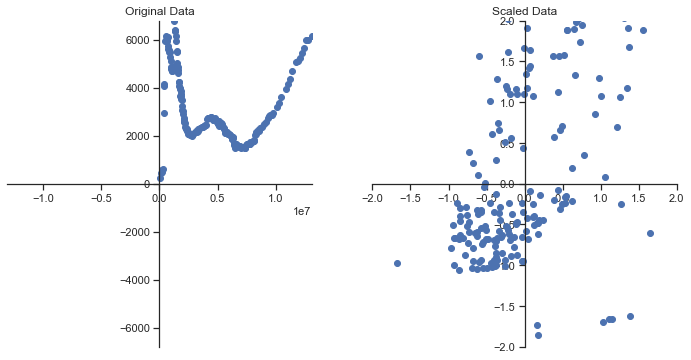

In [54]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["positive"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["positive"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [55]:
X.dtypes

hospitalizedIncrease                  int64
hospitalizedCurrently               float64
positive                              int64
positiveIncrease                      int64
recovered                           float64
positive_shifted_1                  float64
positive_shifted_3                  float64
positive_shifted_7                  float64
positive_shifted_10                 float64
hospitalizedCurrently_shifted_1     float64
hospitalizedCurrently_shifted_3     float64
hospitalizedCurrently_shifted_7     float64
hospitalizedCurrently_shifted_10    float64
recovered_shifted_1                 float64
recovered_shifted_3                 float64
recovered_shifted_7                 float64
recovered_shifted_10                float64
dtype: object

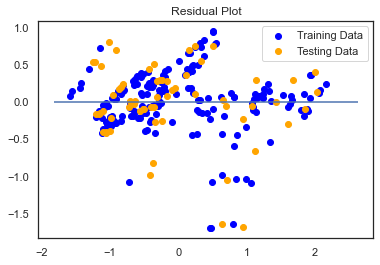

In [56]:
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [57]:
print(f"Training scaled Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing scaled Data Score: {model.score(X_test_scaled, y_test_scaled)}")
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)

Training scaled Data Score: 0.8271730548271974
Testing scaled Data Score: 0.7877029524241304
Weight coefficients: [[ 1.01538386e-02  1.79318921e+00 -2.46893440e+00 -1.12000299e-01
   2.98858428e+00  9.19732425e+00 -1.47148249e+01 -1.27809150e+01
   9.07252757e+00  1.31605405e-01  3.18432173e-02 -1.01364521e+00
  -1.19786802e-01  3.19175457e-01 -9.07632461e+00 -1.29746861e+00
   1.84373938e+01]]
y-axis intercept: [-4.19523939e-15]


In [58]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.24434551555984416, R2: 0.7877029524241304


In [59]:
X_scaled = X_scaler.transform(X)
predictions = model.predict(X_scaled)
print(f"True output:{y[0]}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions[0]).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions[0]).round(2)-y[0]}") 

True output:[258.]
Predicted output:[1358.17]
Prediction Error:[1100.17]


In [60]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)

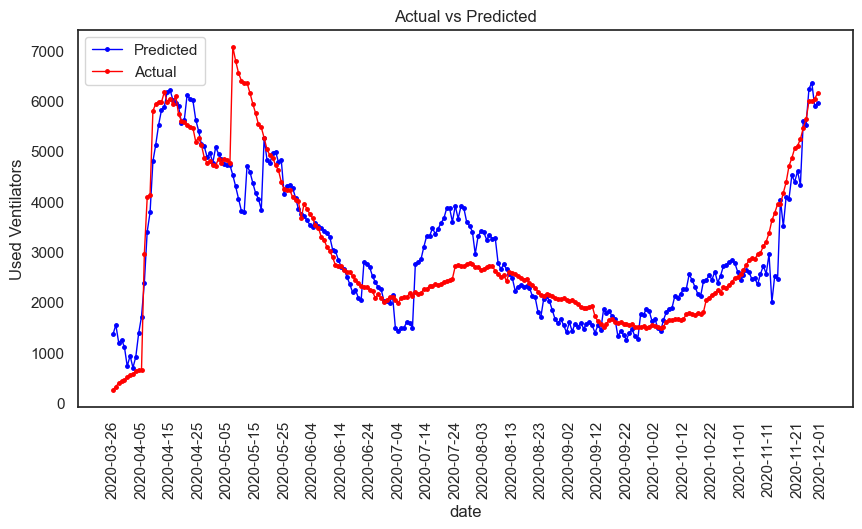

In [61]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data_Offset.index, predicted_y, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data_Offset.index, df_Covid_data_Offset['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()

### Model 4 Neural Network Model

In [65]:
# pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [66]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [72]:
# # define base model
# def baseline_model():
#     # create model
#     model = Sequential()
#     model.add(Dense(17, input_dim=17, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(8, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal'))
#     # Compile model
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model
# # evaluate model
# estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
# kfold = KFold(n_splits=10)
# results = cross_val_score(estimator, X_train_scaled, y_train_scaled, cv=kfold)
# print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -0.06 (0.05) MSE


In [73]:
# # define wider model
# def wider_model():
#     # create model
#     model = Sequential()
#     model.add(Dense(17, input_dim=17, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal'))
#     # Compile model
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model
# # evaluate model with standardized dataset
# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
# pipeline = Pipeline(estimators)
# kfold = KFold(n_splits=10)
# results = cross_val_score(pipeline, X, y, cv=kfold)
# print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -4109708.37 (3636988.09) MSE


In [101]:
# create model
model = Sequential()
model.add(Dense(17, input_dim=17, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [102]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=3000,
    shuffle=False,
    verbose=2
)

Epoch 1/3000
6/6 - 0s - loss: 0.9962
Epoch 2/3000
6/6 - 0s - loss: 0.9915
Epoch 3/3000
6/6 - 0s - loss: 0.9861
Epoch 4/3000
6/6 - 0s - loss: 0.9793
Epoch 5/3000
6/6 - 0s - loss: 0.9703
Epoch 6/3000
6/6 - 0s - loss: 0.9583
Epoch 7/3000
6/6 - 0s - loss: 0.9424
Epoch 8/3000
6/6 - 0s - loss: 0.9218
Epoch 9/3000
6/6 - 0s - loss: 0.8958
Epoch 10/3000
6/6 - 0s - loss: 0.8637
Epoch 11/3000
6/6 - 0s - loss: 0.8258
Epoch 12/3000
6/6 - 0s - loss: 0.7825
Epoch 13/3000
6/6 - 0s - loss: 0.7357
Epoch 14/3000
6/6 - 0s - loss: 0.6884
Epoch 15/3000
6/6 - 0s - loss: 0.6441
Epoch 16/3000
6/6 - 0s - loss: 0.6059
Epoch 17/3000
6/6 - 0s - loss: 0.5750
Epoch 18/3000
6/6 - 0s - loss: 0.5508
Epoch 19/3000
6/6 - 0s - loss: 0.5304
Epoch 20/3000
6/6 - 0s - loss: 0.5135
Epoch 21/3000
6/6 - 0s - loss: 0.4988
Epoch 22/3000
6/6 - 0s - loss: 0.4846
Epoch 23/3000
6/6 - 0s - loss: 0.4709
Epoch 24/3000
6/6 - 0s - loss: 0.4562
Epoch 25/3000
6/6 - 0s - loss: 0.4409
Epoch 26/3000
6/6 - 0s - loss: 0.4252
Epoch 27/3000
6/6 - 0

Epoch 214/3000
6/6 - 0s - loss: 0.0708
Epoch 215/3000
6/6 - 0s - loss: 0.0704
Epoch 216/3000
6/6 - 0s - loss: 0.0702
Epoch 217/3000
6/6 - 0s - loss: 0.0698
Epoch 218/3000
6/6 - 0s - loss: 0.0695
Epoch 219/3000
6/6 - 0s - loss: 0.0692
Epoch 220/3000
6/6 - 0s - loss: 0.0690
Epoch 221/3000
6/6 - 0s - loss: 0.0686
Epoch 222/3000
6/6 - 0s - loss: 0.0684
Epoch 223/3000
6/6 - 0s - loss: 0.0680
Epoch 224/3000
6/6 - 0s - loss: 0.0678
Epoch 225/3000
6/6 - 0s - loss: 0.0674
Epoch 226/3000
6/6 - 0s - loss: 0.0672
Epoch 227/3000
6/6 - 0s - loss: 0.0668
Epoch 228/3000
6/6 - 0s - loss: 0.0666
Epoch 229/3000
6/6 - 0s - loss: 0.0662
Epoch 230/3000
6/6 - 0s - loss: 0.0660
Epoch 231/3000
6/6 - 0s - loss: 0.0657
Epoch 232/3000
6/6 - 0s - loss: 0.0654
Epoch 233/3000
6/6 - 0s - loss: 0.0651
Epoch 234/3000
6/6 - 0s - loss: 0.0649
Epoch 235/3000
6/6 - 0s - loss: 0.0646
Epoch 236/3000
6/6 - 0s - loss: 0.0643
Epoch 237/3000
6/6 - 0s - loss: 0.0640
Epoch 238/3000
6/6 - 0s - loss: 0.0638
Epoch 239/3000
6/6 - 0s -

6/6 - 0s - loss: 0.0301
Epoch 425/3000
6/6 - 0s - loss: 0.0299
Epoch 426/3000
6/6 - 0s - loss: 0.0297
Epoch 427/3000
6/6 - 0s - loss: 0.0296
Epoch 428/3000
6/6 - 0s - loss: 0.0295
Epoch 429/3000
6/6 - 0s - loss: 0.0293
Epoch 430/3000
6/6 - 0s - loss: 0.0292
Epoch 431/3000
6/6 - 0s - loss: 0.0291
Epoch 432/3000
6/6 - 0s - loss: 0.0289
Epoch 433/3000
6/6 - 0s - loss: 0.0288
Epoch 434/3000
6/6 - 0s - loss: 0.0287
Epoch 435/3000
6/6 - 0s - loss: 0.0285
Epoch 436/3000
6/6 - 0s - loss: 0.0284
Epoch 437/3000
6/6 - 0s - loss: 0.0283
Epoch 438/3000
6/6 - 0s - loss: 0.0281
Epoch 439/3000
6/6 - 0s - loss: 0.0280
Epoch 440/3000
6/6 - 0s - loss: 0.0278
Epoch 441/3000
6/6 - 0s - loss: 0.0277
Epoch 442/3000
6/6 - 0s - loss: 0.0275
Epoch 443/3000
6/6 - 0s - loss: 0.0274
Epoch 444/3000
6/6 - 0s - loss: 0.0273
Epoch 445/3000
6/6 - 0s - loss: 0.0271
Epoch 446/3000
6/6 - 0s - loss: 0.0271
Epoch 447/3000
6/6 - 0s - loss: 0.0269
Epoch 448/3000
6/6 - 0s - loss: 0.0267
Epoch 449/3000
6/6 - 0s - loss: 0.0266
E

Epoch 635/3000
6/6 - 0s - loss: 0.0094
Epoch 636/3000
6/6 - 0s - loss: 0.0093
Epoch 637/3000
6/6 - 0s - loss: 0.0093
Epoch 638/3000
6/6 - 0s - loss: 0.0092
Epoch 639/3000
6/6 - 0s - loss: 0.0092
Epoch 640/3000
6/6 - 0s - loss: 0.0091
Epoch 641/3000
6/6 - 0s - loss: 0.0091
Epoch 642/3000
6/6 - 0s - loss: 0.0090
Epoch 643/3000
6/6 - 0s - loss: 0.0089
Epoch 644/3000
6/6 - 0s - loss: 0.0089
Epoch 645/3000
6/6 - 0s - loss: 0.0089
Epoch 646/3000
6/6 - 0s - loss: 0.0089
Epoch 647/3000
6/6 - 0s - loss: 0.0089
Epoch 648/3000
6/6 - 0s - loss: 0.0088
Epoch 649/3000
6/6 - 0s - loss: 0.0087
Epoch 650/3000
6/6 - 0s - loss: 0.0086
Epoch 651/3000
6/6 - 0s - loss: 0.0087
Epoch 652/3000
6/6 - 0s - loss: 0.0087
Epoch 653/3000
6/6 - 0s - loss: 0.0086
Epoch 654/3000
6/6 - 0s - loss: 0.0085
Epoch 655/3000
6/6 - 0s - loss: 0.0085
Epoch 656/3000
6/6 - 0s - loss: 0.0084
Epoch 657/3000
6/6 - 0s - loss: 0.0083
Epoch 658/3000
6/6 - 0s - loss: 0.0085
Epoch 659/3000
6/6 - 0s - loss: 0.0083
Epoch 660/3000
6/6 - 0s -

Epoch 846/3000
6/6 - 0s - loss: 0.0044
Epoch 847/3000
6/6 - 0s - loss: 0.0045
Epoch 848/3000
6/6 - 0s - loss: 0.0045
Epoch 849/3000
6/6 - 0s - loss: 0.0044
Epoch 850/3000
6/6 - 0s - loss: 0.0045
Epoch 851/3000
6/6 - 0s - loss: 0.0045
Epoch 852/3000
6/6 - 0s - loss: 0.0043
Epoch 853/3000
6/6 - 0s - loss: 0.0043
Epoch 854/3000
6/6 - 0s - loss: 0.0044
Epoch 855/3000
6/6 - 0s - loss: 0.0045
Epoch 856/3000
6/6 - 0s - loss: 0.0043
Epoch 857/3000
6/6 - 0s - loss: 0.0043
Epoch 858/3000
6/6 - 0s - loss: 0.0045
Epoch 859/3000
6/6 - 0s - loss: 0.0043
Epoch 860/3000
6/6 - 0s - loss: 0.0042
Epoch 861/3000
6/6 - 0s - loss: 0.0044
Epoch 862/3000
6/6 - 0s - loss: 0.0044
Epoch 863/3000
6/6 - 0s - loss: 0.0042
Epoch 864/3000
6/6 - 0s - loss: 0.0043
Epoch 865/3000
6/6 - 0s - loss: 0.0044
Epoch 866/3000
6/6 - 0s - loss: 0.0042
Epoch 867/3000
6/6 - 0s - loss: 0.0043
Epoch 868/3000
6/6 - 0s - loss: 0.0044
Epoch 869/3000
6/6 - 0s - loss: 0.0042
Epoch 870/3000
6/6 - 0s - loss: 0.0043
Epoch 871/3000
6/6 - 0s -

Epoch 1055/3000
6/6 - 0s - loss: 0.0032
Epoch 1056/3000
6/6 - 0s - loss: 0.0032
Epoch 1057/3000
6/6 - 0s - loss: 0.0032
Epoch 1058/3000
6/6 - 0s - loss: 0.0032
Epoch 1059/3000
6/6 - 0s - loss: 0.0032
Epoch 1060/3000
6/6 - 0s - loss: 0.0032
Epoch 1061/3000
6/6 - 0s - loss: 0.0032
Epoch 1062/3000
6/6 - 0s - loss: 0.0031
Epoch 1063/3000
6/6 - 0s - loss: 0.0032
Epoch 1064/3000
6/6 - 0s - loss: 0.0032
Epoch 1065/3000
6/6 - 0s - loss: 0.0032
Epoch 1066/3000
6/6 - 0s - loss: 0.0031
Epoch 1067/3000
6/6 - 0s - loss: 0.0032
Epoch 1068/3000
6/6 - 0s - loss: 0.0031
Epoch 1069/3000
6/6 - 0s - loss: 0.0032
Epoch 1070/3000
6/6 - 0s - loss: 0.0031
Epoch 1071/3000
6/6 - 0s - loss: 0.0031
Epoch 1072/3000
6/6 - 0s - loss: 0.0031
Epoch 1073/3000
6/6 - 0s - loss: 0.0032
Epoch 1074/3000
6/6 - 0s - loss: 0.0031
Epoch 1075/3000
6/6 - 0s - loss: 0.0031
Epoch 1076/3000
6/6 - 0s - loss: 0.0031
Epoch 1077/3000
6/6 - 0s - loss: 0.0031
Epoch 1078/3000
6/6 - 0s - loss: 0.0031
Epoch 1079/3000
6/6 - 0s - loss: 0.0031


Epoch 1260/3000
6/6 - 0s - loss: 0.0026
Epoch 1261/3000
6/6 - 0s - loss: 0.0026
Epoch 1262/3000
6/6 - 0s - loss: 0.0026
Epoch 1263/3000
6/6 - 0s - loss: 0.0026
Epoch 1264/3000
6/6 - 0s - loss: 0.0026
Epoch 1265/3000
6/6 - 0s - loss: 0.0027
Epoch 1266/3000
6/6 - 0s - loss: 0.0026
Epoch 1267/3000
6/6 - 0s - loss: 0.0026
Epoch 1268/3000
6/6 - 0s - loss: 0.0027
Epoch 1269/3000
6/6 - 0s - loss: 0.0026
Epoch 1270/3000
6/6 - 0s - loss: 0.0026
Epoch 1271/3000
6/6 - 0s - loss: 0.0026
Epoch 1272/3000
6/6 - 0s - loss: 0.0026
Epoch 1273/3000
6/6 - 0s - loss: 0.0027
Epoch 1274/3000
6/6 - 0s - loss: 0.0026
Epoch 1275/3000
6/6 - 0s - loss: 0.0026
Epoch 1276/3000
6/6 - 0s - loss: 0.0026
Epoch 1277/3000
6/6 - 0s - loss: 0.0026
Epoch 1278/3000
6/6 - 0s - loss: 0.0026
Epoch 1279/3000
6/6 - 0s - loss: 0.0026
Epoch 1280/3000
6/6 - 0s - loss: 0.0026
Epoch 1281/3000
6/6 - 0s - loss: 0.0026
Epoch 1282/3000
6/6 - 0s - loss: 0.0026
Epoch 1283/3000
6/6 - 0s - loss: 0.0026
Epoch 1284/3000
6/6 - 0s - loss: 0.0026


Epoch 1465/3000
6/6 - 0s - loss: 0.0023
Epoch 1466/3000
6/6 - 0s - loss: 0.0022
Epoch 1467/3000
6/6 - 0s - loss: 0.0023
Epoch 1468/3000
6/6 - 0s - loss: 0.0024
Epoch 1469/3000
6/6 - 0s - loss: 0.0023
Epoch 1470/3000
6/6 - 0s - loss: 0.0022
Epoch 1471/3000
6/6 - 0s - loss: 0.0023
Epoch 1472/3000
6/6 - 0s - loss: 0.0023
Epoch 1473/3000
6/6 - 0s - loss: 0.0022
Epoch 1474/3000
6/6 - 0s - loss: 0.0022
Epoch 1475/3000
6/6 - 0s - loss: 0.0023
Epoch 1476/3000
6/6 - 0s - loss: 0.0023
Epoch 1477/3000
6/6 - 0s - loss: 0.0022
Epoch 1478/3000
6/6 - 0s - loss: 0.0022
Epoch 1479/3000
6/6 - 0s - loss: 0.0023
Epoch 1480/3000
6/6 - 0s - loss: 0.0023
Epoch 1481/3000
6/6 - 0s - loss: 0.0023
Epoch 1482/3000
6/6 - 0s - loss: 0.0023
Epoch 1483/3000
6/6 - 0s - loss: 0.0023
Epoch 1484/3000
6/6 - 0s - loss: 0.0022
Epoch 1485/3000
6/6 - 0s - loss: 0.0023
Epoch 1486/3000
6/6 - 0s - loss: 0.0023
Epoch 1487/3000
6/6 - 0s - loss: 0.0023
Epoch 1488/3000
6/6 - 0s - loss: 0.0022
Epoch 1489/3000
6/6 - 0s - loss: 0.0022


Epoch 1670/3000
6/6 - 0s - loss: 0.0021
Epoch 1671/3000
6/6 - 0s - loss: 0.0021
Epoch 1672/3000
6/6 - 0s - loss: 0.0021
Epoch 1673/3000
6/6 - 0s - loss: 0.0022
Epoch 1674/3000
6/6 - 0s - loss: 0.0021
Epoch 1675/3000
6/6 - 0s - loss: 0.0021
Epoch 1676/3000
6/6 - 0s - loss: 0.0021
Epoch 1677/3000
6/6 - 0s - loss: 0.0021
Epoch 1678/3000
6/6 - 0s - loss: 0.0021
Epoch 1679/3000
6/6 - 0s - loss: 0.0022
Epoch 1680/3000
6/6 - 0s - loss: 0.0021
Epoch 1681/3000
6/6 - 0s - loss: 0.0020
Epoch 1682/3000
6/6 - 0s - loss: 0.0020
Epoch 1683/3000
6/6 - 0s - loss: 0.0022
Epoch 1684/3000
6/6 - 0s - loss: 0.0021
Epoch 1685/3000
6/6 - 0s - loss: 0.0020
Epoch 1686/3000
6/6 - 0s - loss: 0.0021
Epoch 1687/3000
6/6 - 0s - loss: 0.0021
Epoch 1688/3000
6/6 - 0s - loss: 0.0021
Epoch 1689/3000
6/6 - 0s - loss: 0.0021
Epoch 1690/3000
6/6 - 0s - loss: 0.0021
Epoch 1691/3000
6/6 - 0s - loss: 0.0021
Epoch 1692/3000
6/6 - 0s - loss: 0.0021
Epoch 1693/3000
6/6 - 0s - loss: 0.0020
Epoch 1694/3000
6/6 - 0s - loss: 0.0021


Epoch 1875/3000
6/6 - 0s - loss: 0.0020
Epoch 1876/3000
6/6 - 0s - loss: 0.0019
Epoch 1877/3000
6/6 - 0s - loss: 0.0019
Epoch 1878/3000
6/6 - 0s - loss: 0.0019
Epoch 1879/3000
6/6 - 0s - loss: 0.0020
Epoch 1880/3000
6/6 - 0s - loss: 0.0019
Epoch 1881/3000
6/6 - 0s - loss: 0.0019
Epoch 1882/3000
6/6 - 0s - loss: 0.0019
Epoch 1883/3000
6/6 - 0s - loss: 0.0019
Epoch 1884/3000
6/6 - 0s - loss: 0.0019
Epoch 1885/3000
6/6 - 0s - loss: 0.0019
Epoch 1886/3000
6/6 - 0s - loss: 0.0019
Epoch 1887/3000
6/6 - 0s - loss: 0.0019
Epoch 1888/3000
6/6 - 0s - loss: 0.0019
Epoch 1889/3000
6/6 - 0s - loss: 0.0019
Epoch 1890/3000
6/6 - 0s - loss: 0.0019
Epoch 1891/3000
6/6 - 0s - loss: 0.0020
Epoch 1892/3000
6/6 - 0s - loss: 0.0019
Epoch 1893/3000
6/6 - 0s - loss: 0.0020
Epoch 1894/3000
6/6 - 0s - loss: 0.0019
Epoch 1895/3000
6/6 - 0s - loss: 0.0020
Epoch 1896/3000
6/6 - 0s - loss: 0.0019
Epoch 1897/3000
6/6 - 0s - loss: 0.0020
Epoch 1898/3000
6/6 - 0s - loss: 0.0019
Epoch 1899/3000
6/6 - 0s - loss: 0.0020


Epoch 2080/3000
6/6 - 0s - loss: 0.0019
Epoch 2081/3000
6/6 - 0s - loss: 0.0018
Epoch 2082/3000
6/6 - 0s - loss: 0.0019
Epoch 2083/3000
6/6 - 0s - loss: 0.0019
Epoch 2084/3000
6/6 - 0s - loss: 0.0019
Epoch 2085/3000
6/6 - 0s - loss: 0.0018
Epoch 2086/3000
6/6 - 0s - loss: 0.0019
Epoch 2087/3000
6/6 - 0s - loss: 0.0019
Epoch 2088/3000
6/6 - 0s - loss: 0.0019
Epoch 2089/3000
6/6 - 0s - loss: 0.0019
Epoch 2090/3000
6/6 - 0s - loss: 0.0019
Epoch 2091/3000
6/6 - 0s - loss: 0.0019
Epoch 2092/3000
6/6 - 0s - loss: 0.0019
Epoch 2093/3000
6/6 - 0s - loss: 0.0019
Epoch 2094/3000
6/6 - 0s - loss: 0.0020
Epoch 2095/3000
6/6 - 0s - loss: 0.0019
Epoch 2096/3000
6/6 - 0s - loss: 0.0019
Epoch 2097/3000
6/6 - 0s - loss: 0.0020
Epoch 2098/3000
6/6 - 0s - loss: 0.0022
Epoch 2099/3000
6/6 - 0s - loss: 0.0019
Epoch 2100/3000
6/6 - 0s - loss: 0.0019
Epoch 2101/3000
6/6 - 0s - loss: 0.0020
Epoch 2102/3000
6/6 - 0s - loss: 0.0023
Epoch 2103/3000
6/6 - 0s - loss: 0.0020
Epoch 2104/3000
6/6 - 0s - loss: 0.0019


Epoch 2285/3000
6/6 - 0s - loss: 0.0023
Epoch 2286/3000
6/6 - 0s - loss: 0.0021
Epoch 2287/3000
6/6 - 0s - loss: 0.0021
Epoch 2288/3000
6/6 - 0s - loss: 0.0025
Epoch 2289/3000
6/6 - 0s - loss: 0.0020
Epoch 2290/3000
6/6 - 0s - loss: 0.0019
Epoch 2291/3000
6/6 - 0s - loss: 0.0024
Epoch 2292/3000
6/6 - 0s - loss: 0.0020
Epoch 2293/3000
6/6 - 0s - loss: 0.0019
Epoch 2294/3000
6/6 - 0s - loss: 0.0021
Epoch 2295/3000
6/6 - 0s - loss: 0.0021
Epoch 2296/3000
6/6 - 0s - loss: 0.0018
Epoch 2297/3000
6/6 - 0s - loss: 0.0019
Epoch 2298/3000
6/6 - 0s - loss: 0.0021
Epoch 2299/3000
6/6 - 0s - loss: 0.0018
Epoch 2300/3000
6/6 - 0s - loss: 0.0018
Epoch 2301/3000
6/6 - 0s - loss: 0.0021
Epoch 2302/3000
6/6 - 0s - loss: 0.0017
Epoch 2303/3000
6/6 - 0s - loss: 0.0017
Epoch 2304/3000
6/6 - 0s - loss: 0.0019
Epoch 2305/3000
6/6 - 0s - loss: 0.0018
Epoch 2306/3000
6/6 - 0s - loss: 0.0017
Epoch 2307/3000
6/6 - 0s - loss: 0.0018
Epoch 2308/3000
6/6 - 0s - loss: 0.0018
Epoch 2309/3000
6/6 - 0s - loss: 0.0017


Epoch 2490/3000
6/6 - 0s - loss: 0.0022
Epoch 2491/3000
6/6 - 0s - loss: 0.0026
Epoch 2492/3000
6/6 - 0s - loss: 0.0021
Epoch 2493/3000
6/6 - 0s - loss: 0.0021
Epoch 2494/3000
6/6 - 0s - loss: 0.0027
Epoch 2495/3000
6/6 - 0s - loss: 0.0022
Epoch 2496/3000
6/6 - 0s - loss: 0.0022
Epoch 2497/3000
6/6 - 0s - loss: 0.0028
Epoch 2498/3000
6/6 - 0s - loss: 0.0023
Epoch 2499/3000
6/6 - 0s - loss: 0.0021
Epoch 2500/3000
6/6 - 0s - loss: 0.0023
Epoch 2501/3000
6/6 - 0s - loss: 0.0024
Epoch 2502/3000
6/6 - 0s - loss: 0.0021
Epoch 2503/3000
6/6 - 0s - loss: 0.0021
Epoch 2504/3000
6/6 - 0s - loss: 0.0023
Epoch 2505/3000
6/6 - 0s - loss: 0.0018
Epoch 2506/3000
6/6 - 0s - loss: 0.0018
Epoch 2507/3000
6/6 - 0s - loss: 0.0020
Epoch 2508/3000
6/6 - 0s - loss: 0.0016
Epoch 2509/3000
6/6 - 0s - loss: 0.0017
Epoch 2510/3000
6/6 - 0s - loss: 0.0019
Epoch 2511/3000
6/6 - 0s - loss: 0.0016
Epoch 2512/3000
6/6 - 0s - loss: 0.0017
Epoch 2513/3000
6/6 - 0s - loss: 0.0018
Epoch 2514/3000
6/6 - 0s - loss: 0.0016


Epoch 2695/3000
6/6 - 0s - loss: 0.0016
Epoch 2696/3000
6/6 - 0s - loss: 0.0016
Epoch 2697/3000
6/6 - 0s - loss: 0.0016
Epoch 2698/3000
6/6 - 0s - loss: 0.0016
Epoch 2699/3000
6/6 - 0s - loss: 0.0016
Epoch 2700/3000
6/6 - 0s - loss: 0.0016
Epoch 2701/3000
6/6 - 0s - loss: 0.0016
Epoch 2702/3000
6/6 - 0s - loss: 0.0016
Epoch 2703/3000
6/6 - 0s - loss: 0.0016
Epoch 2704/3000
6/6 - 0s - loss: 0.0016
Epoch 2705/3000
6/6 - 0s - loss: 0.0016
Epoch 2706/3000
6/6 - 0s - loss: 0.0016
Epoch 2707/3000
6/6 - 0s - loss: 0.0016
Epoch 2708/3000
6/6 - 0s - loss: 0.0016
Epoch 2709/3000
6/6 - 0s - loss: 0.0016
Epoch 2710/3000
6/6 - 0s - loss: 0.0016
Epoch 2711/3000
6/6 - 0s - loss: 0.0016
Epoch 2712/3000
6/6 - 0s - loss: 0.0016
Epoch 2713/3000
6/6 - 0s - loss: 0.0016
Epoch 2714/3000
6/6 - 0s - loss: 0.0016
Epoch 2715/3000
6/6 - 0s - loss: 0.0016
Epoch 2716/3000
6/6 - 0s - loss: 0.0016
Epoch 2717/3000
6/6 - 0s - loss: 0.0016
Epoch 2718/3000
6/6 - 0s - loss: 0.0016
Epoch 2719/3000
6/6 - 0s - loss: 0.0016


Epoch 2900/3000
6/6 - 0s - loss: 0.0016
Epoch 2901/3000
6/6 - 0s - loss: 0.0016
Epoch 2902/3000
6/6 - 0s - loss: 0.0017
Epoch 2903/3000
6/6 - 0s - loss: 0.0016
Epoch 2904/3000
6/6 - 0s - loss: 0.0015
Epoch 2905/3000
6/6 - 0s - loss: 0.0017
Epoch 2906/3000
6/6 - 0s - loss: 0.0016
Epoch 2907/3000
6/6 - 0s - loss: 0.0015
Epoch 2908/3000
6/6 - 0s - loss: 0.0016
Epoch 2909/3000
6/6 - 0s - loss: 0.0017
Epoch 2910/3000
6/6 - 0s - loss: 0.0015
Epoch 2911/3000
6/6 - 0s - loss: 0.0015
Epoch 2912/3000
6/6 - 0s - loss: 0.0017
Epoch 2913/3000
6/6 - 0s - loss: 0.0017
Epoch 2914/3000
6/6 - 0s - loss: 0.0015
Epoch 2915/3000
6/6 - 0s - loss: 0.0016
Epoch 2916/3000
6/6 - 0s - loss: 0.0017
Epoch 2917/3000
6/6 - 0s - loss: 0.0016
Epoch 2918/3000
6/6 - 0s - loss: 0.0016
Epoch 2919/3000
6/6 - 0s - loss: 0.0017
Epoch 2920/3000
6/6 - 0s - loss: 0.0016
Epoch 2921/3000
6/6 - 0s - loss: 0.0015
Epoch 2922/3000
6/6 - 0s - loss: 0.0016
Epoch 2923/3000
6/6 - 0s - loss: 0.0018
Epoch 2924/3000
6/6 - 0s - loss: 0.0016


In [103]:
X_scaled = X_scaler.transform(X)
predictions = model.predict(X_scaled)
print(f"True output:{y[0]}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions[0]).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions[0]).round(2)-y[0]}") 

True output:[258.]
Predicted output:[231.39]
Prediction Error:[-26.61000061]


In [104]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)

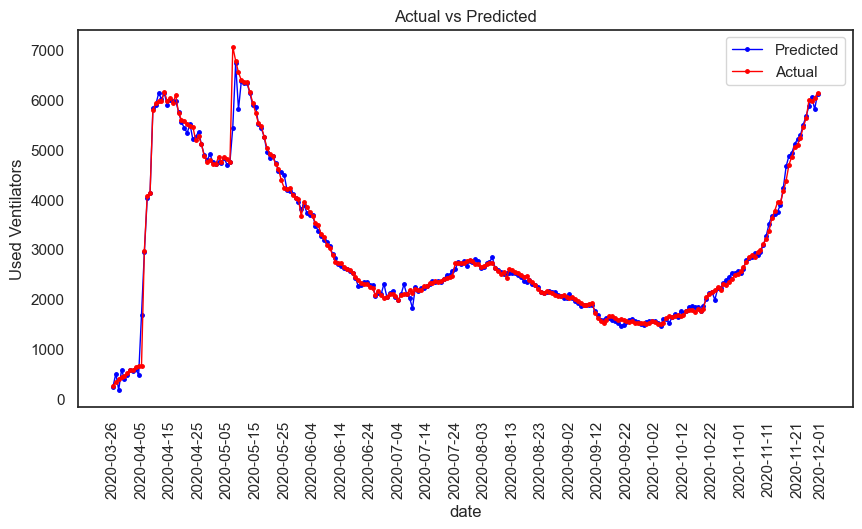

In [105]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data_Offset.index, predicted_y, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data_Offset.index, df_Covid_data_Offset['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()

### Saving the model

In [112]:
# Save the model
model.save("On_Ventilator_ANN_"+today.strftime("%Y-%m-%d")+".h5")

In [113]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("On_Ventilator_ANN_"+today.strftime("%Y-%m-%d")+".h5")

### Load and prepare the data that we will make the future predictions on
